In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, fetch_olivetti_faces
import time
import pandas as pd
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, make_scorer
from information import ITPC
import numpy as np
import warnings
import matplotlib.pyplot as plt

iris = load_iris()            #iris.data, iris.target
wine = load_wine()            #wine.data, wine.target
WDPC = load_breast_cancer()   #WDPC.data, WDPC.target
faces = fetch_olivetti_faces()   #400 pictures with 40 people! Not 5 as in the paper

In [2]:
data = pd.read_csv('glass.csv')
X_glass, y_glass = data.drop('Type', axis=1), data.Type

In [7]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, make_scorer
#import matplotlib
#matplotlib.style.use('seaborn') # ggplot

num_clusters_iris = len(np.unique(iris.target))
num_clusters_wine = len(np.unique(wine.target))
num_clusters_cancer = len(np.unique(WDPC.target))
num_clusters_faces = len(np.unique(faces.target))
num_clusters_glass = len(np.unique(y_glass))

methods = {
    "SpectralClustering": ["g", SpectralClustering(eigen_solver = 'arpack', affinity =  'nearest_neighbors', random_state = 7)], 
    "KMeans": ["c", KMeans(random_state = 0)],
    "AgglomerativeClustering" : ["b", AgglomerativeClustering()],
    "Our Algo" : ["r", ITPC(affinity =  'rbf', verbose = False, random_state=15)]}

print("True number of clusters for iris data is {}".format(num_clusters_iris))
print("True number of clusters for wine data is {}".format(num_clusters_wine))
print("True number of clusters for cancer data is {}".format(num_clusters_cancer))
print("True number of clusters for faces data is {}".format(num_clusters_faces))
print("True number of clusters for glass data is {}".format(num_clusters_glass))

True number of clusters for iris data is 3
True number of clusters for wine data is 3
True number of clusters for cancer data is 2
True number of clusters for faces data is 40
True number of clusters for glass data is 6


In [8]:
clusters_iris = np.arange(2, 6)
clusters_wine = np.arange(2, 6)
clusters_cancer = np.arange(1, 5)
clusters_faces = np.arange(38, 43)
clusters_glass = np.arange(4, 9)

In [21]:
def plot_scores(X, y, num_clusters, clusters, methods):

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    scores_ami = np.zeros((len(methods.items()), len(clusters)))
    scores_ar = np.zeros((len(methods.items()), len(clusters)))
    time_all = np.zeros((len(methods.items()), len(clusters)))
    scores_true = np.zeros((len(methods.items()), 2))

    for i, (name, (color, method)) in enumerate(methods.items()):
        params = {}
        for j, clust in enumerate(clusters):
            params['n_clusters'] = clust
            method.set_params(**params)
            start = time.time()
            method.fit(X)
            time_all[i,j] = time.time() - start
            y_pred = method.fit_predict(X)
            scores_ami[i,j] = adjusted_mutual_info_score(y,  y_pred)
            scores_ar[i, j] = adjusted_rand_score(y, y_pred)
        
        ax[0].plot(clusters, scores_ami[i, :], label=name, color=color, alpha=0.5)
        ax[1].plot(clusters, scores_ar[i, :], label=name, color=color, alpha=0.5)
        
        params['n_clusters'] = num_clusters
        method.set_params(**params)
        method.fit(X)
        y_pred = method.fit_predict(X)
        scores_true[i,0] = adjusted_mutual_info_score(y,  y_pred)
        scores_true[i, 1] = adjusted_rand_score(y, y_pred)
        
    time_avg = np.mean(time_all, axis = 1)
    ax[0].set_title('Adjusted Mutual Information Score')
    ax[1].set_title('Adjusted Random Score')
    for ax in ax:
        ax.legend(['SC', 'KM', 'AC', 'ITPC'], loc='upper right', frameon=True, edgecolor='gray')
        ax.axvline(x=num_clusters, c='b', linestyle=':')
        ax.set_xlabel('Number of clusters')
    return fig, ax, scores_ami, scores_ar, time_avg, scores_true

Text(0.5, 0.98, 'Iris Data')

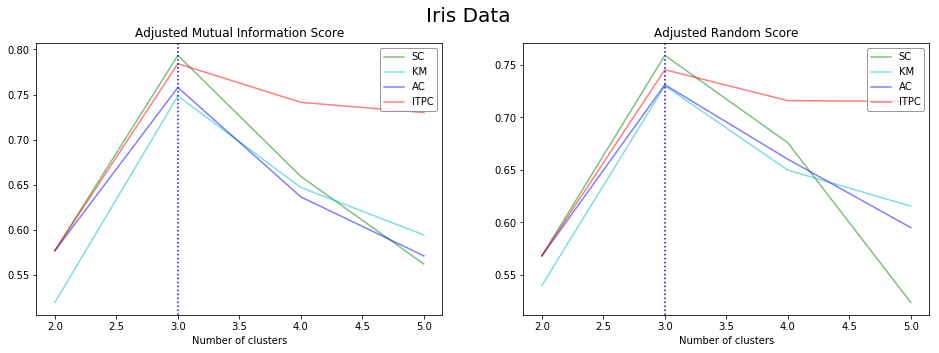

In [22]:
warnings.filterwarnings("ignore")
fig_iris, ax_iris, scores_ami_iris, scores_ar_iris, time_iris, scores_true_iris = \
plot_scores(iris.data, iris.target, num_clusters_iris, clusters_iris, methods)
fig_iris.suptitle('Iris Data', fontsize = 20)   

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

<178x178 sparse matrix of type '<class 'numpy.float64'>'
	with 3060 stored elements in Compressed Sparse Row format>

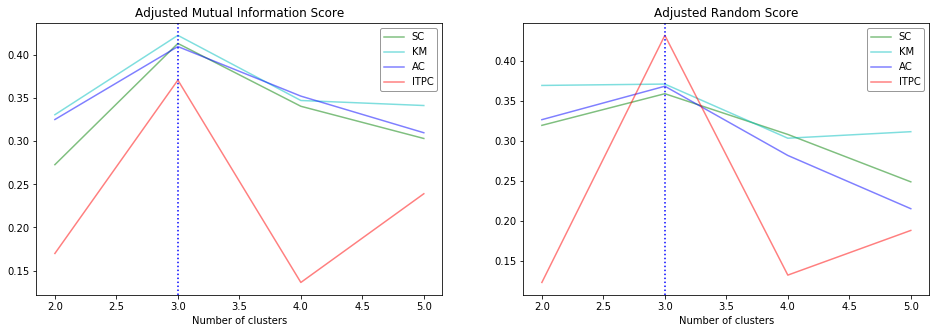

In [23]:
methods_wine = {
    "SpectralClustering": ["g", SpectralClustering(eigen_solver = 'arpack', affinity =  'nearest_neighbors', random_state = 7)], 
    "KMeans": ["c", KMeans(random_state = 0)],
    "AgglomerativeClustering" : ["b", AgglomerativeClustering()],
    "Our Algo" : ["r", ITPC(affinity =  'nearest_neighbors', n_neighbors=15, verbose = False, random_state=108)]}

fig_wine, ax_wine, scores_ami_wine, scores_ar_wine, time_wine, scores_true_wine = \
plot_scores(wine.data, wine.target, num_clusters_wine, clusters_wine, methods_wine)

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

<569x569 sparse matrix of type '<class 'numpy.float64'>'
	with 10565 stored elements in Compressed Sparse Row format>

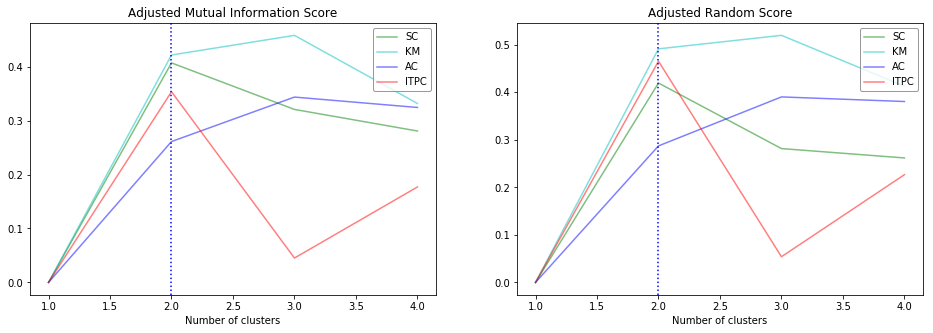

In [24]:
methods_cancer = {
    "SpectralClustering": ["g", SpectralClustering(eigen_solver = 'arpack', affinity =  'nearest_neighbors', random_state = 7)], 
    "KMeans": ["c", KMeans(random_state = 0)],
    "AgglomerativeClustering" : ["b", AgglomerativeClustering()],
    "Our Algo" : ["r", ITPC(affinity =  'nearest_neighbors', n_neighbors=15, verbose = False, random_state=25)]}

fig_cancer, ax_cancer, scores_ami_cancer, scores_ar_cancer, time_cancer, scores_true_cancer = \
plot_scores(WDPC.data, WDPC.target, num_clusters_cancer, clusters_cancer, methods_cancer)

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

<214x214 sparse matrix of type '<class 'numpy.float64'>'
	with 4370 stored elements in Compressed Sparse Row format>

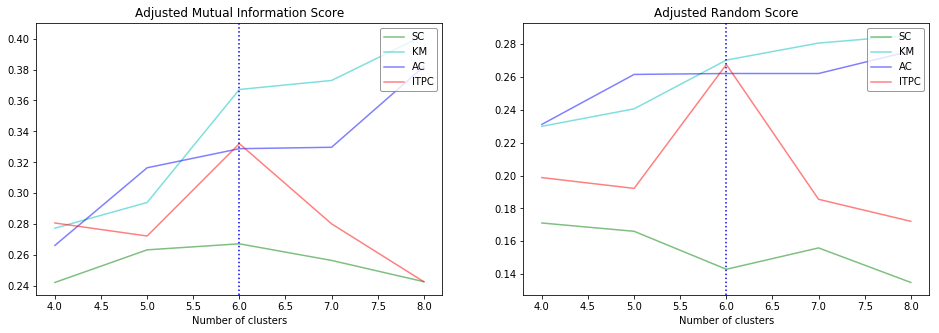

In [25]:
methods_glass = {
    "SpectralClustering": ["g", SpectralClustering(eigen_solver = 'arpack', affinity =  'nearest_neighbors', random_state = 7)], 
    "KMeans": ["c", KMeans(random_state = 0)],
    "AgglomerativeClustering" : ["b", AgglomerativeClustering()],
    "Our Algo" : ["r", ITPC(affinity =  'nearest_neighbors', n_neighbors=15, verbose = False, random_state=398)]}

fig_glass, ax_glass, scores_ami_glass, scores_ar_glass, time_glass, scores_true_glass = \
plot_scores(X_glass, y_glass, num_clusters_glass, clusters_glass, methods_glass)

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

<400x400 sparse matrix of type '<class 'numpy.float64'>'
	with 6056 stored elements in Compressed Sparse Row format>

Text(0.5, 0.98, 'Faces Data')

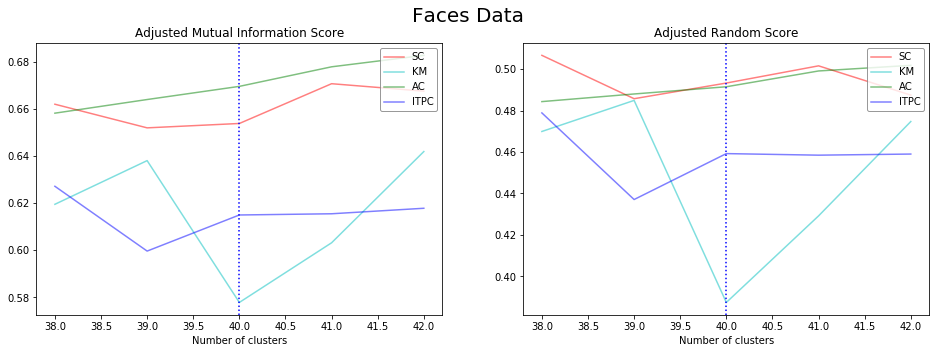

In [26]:
methods_faces = {
    "SpectralClustering": ["r", SpectralClustering(eigen_solver = 'arpack', affinity =  'nearest_neighbors', random_state = 7)], 
    "KMeans": ["c", KMeans(random_state = 0)],
    "AgglomerativeClustering" : ["g", AgglomerativeClustering()],
    "Our Algo" : ["b", ITPC(affinity =  'nearest_neighbors', n_neighbors=11, verbose = False, random_state=137)]}

fig_faces, ax_faces, scores_ami_faces, scores_ar_faces, time_faces, scores_true_faces = \
plot_scores(faces.data, faces.target, num_clusters_faces, clusters_faces, methods_faces)
fig_faces.suptitle('Faces Data', fontsize = 20)  

In [27]:
# table of scores
all_scores = np.vstack((scores_true_iris.flatten(), scores_true_wine.flatten(), scores_true_cancer.flatten(), \
                        scores_true_faces.flatten(), scores_true_glass.flatten()))

all_clusters = np.vstack((num_clusters_iris, num_clusters_wine, num_clusters_cancer, num_clusters_faces, num_clusters_glass))
score_table = np.hstack((all_clusters, all_scores))

In [28]:
rows = ['Iris', 'Wine', 'Cancer', 'Faces', 'Glass']
columns = ['k', 'Spectral AMI', 'Spectral RI', 'KMeans AMI', 'KMeans RI', 'Agglomerative AMI', 'Agglomerative RI', 'Our Algo AMI', 'Our Algo RI']

In [29]:
df_scores = pd.DataFrame(data=score_table, index = ['Iris', 'Wine', 'Cancer', 'Faces', 'Glass'],\
                  columns = ['k', 'Spectral AMI', 'Spectral RI', 'KMeans AMI', 'KMeans RI', 'Agglomerative AMI', 'Agglomerative RI', 'Our Algo AMI', 'Our Algo RI'])

In [30]:
df_scores.loc['mean'] = df_scores.mean()

In [31]:
df_scores

,k,Spectral AMI,Spectral RI,KMeans AMI,KMeans RI,Agglomerative AMI,Agglomerative RI,Our Algo AMI,Our Algo RI
Iris,3.0,0.793425,0.759199,0.748372,0.730238,0.757803,0.731199,0.784253,0.745504
Wine,3.0,0.413283,0.359061,0.422631,0.371114,0.409653,0.368402,0.370770,0.432008
Cancer,2.0,0.406930,0.419496,0.421517,0.491425,0.261161,0.287246,0.353439,0.465352
Faces,40.0,0.653860,0.493266,0.577843,0.387396,0.669621,0.491475,0.614993,0.459219
Glass,6.0,0.267347,0.142983,0.367096,0.270195,0.328825,0.262031,0.332081,0.267502
mean,10.8,0.506969,0.434801,0.507492,0.450074,0.485413,0.428070,0.491107,0.473917


In [32]:
# table of time

all_time = np.vstack((time_iris, time_wine, time_cancer, time_faces, time_glass))
df_time = pd.DataFrame(all_time, index = ['Iris', 'Wine', 'Cancer', 'Faces', 'Glass'], \
                       columns = ['SpectralClustering', 'KMeans', 'AgglomerativeClustering', 'Our Algo'])

In [33]:
df_time.loc['mean'] = df_time.mean()

In [34]:
df_time

,SpectralClustering,KMeans,AgglomerativeClustering,Our Algo
Iris,0.035393,0.030697,0.001893,0.839752
Wine,0.045221,0.031916,0.001673,6.659517
Cancer,0.119010,0.053786,0.025682,57.104699
Faces,2.515534,3.724519,0.761750,103.124586
Glass,0.073749,0.049935,0.003496,14.111929
mean,0.557781,0.778171,0.158899,36.368097
